In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import scipy 
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [144]:
df_hr = pd.read_csv(r'C:\Users\batman\Downloads\HR_data.csv')
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


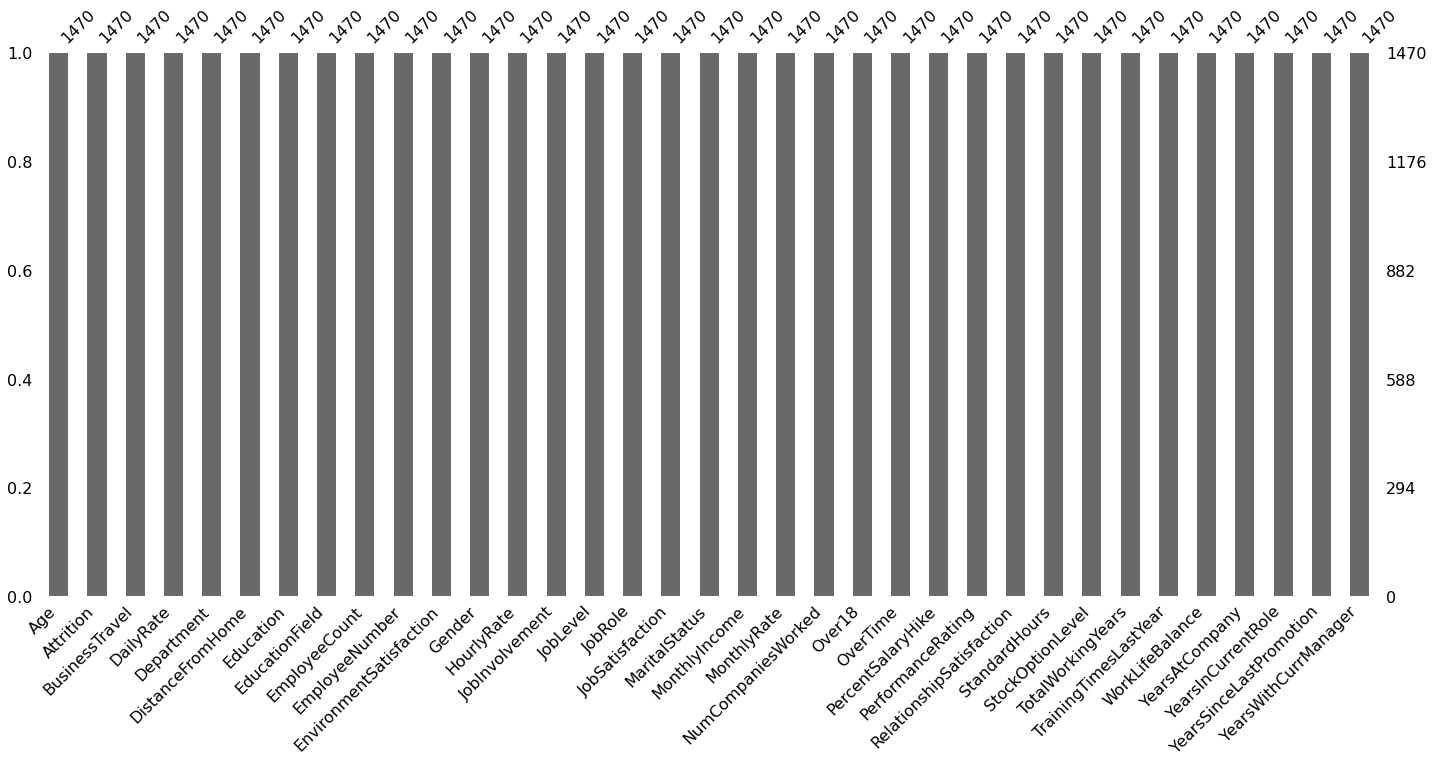

In [145]:
import missingno as msno
msno.bar(df_hr)
#No null values available

In [146]:
#Replacing with numeric values
df_hr['Attrition'] = df_hr['Attrition'].replace('Yes',1)
df_hr['Attrition'] = df_hr['Attrition'].replace('No',0)

In [147]:
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [148]:
for col in df_hr.columns:
    print(col,'**************\n\n',df_hr[col].unique(),'\n\nValue Counts  :  \n',df_hr[col].value_counts(),'\n\n\n\n')

Age **************

 [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] 

Value Counts  :  
 35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64 




Attrition **************

 [1 0] 

Value Counts  :  
 0    1233
1     237
Name: Attrition, dtype: int64 




BusinessTravel **************

 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Value Counts  :  
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 




DailyRate **************

 [1102  279 1373 1392  591 1005 1324 1358  216 1299  

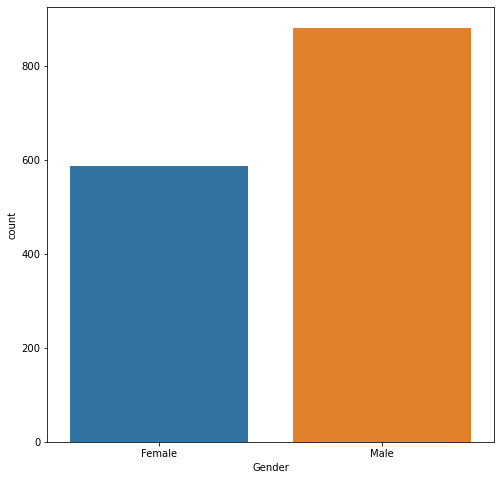

In [149]:
#Data Visualization 
plt.figure(figsize=(8,8))
sns.countplot(x='Gender',data=df_hr)
plt.show()

Gender vs  RelationshipSatisfaction 
*************


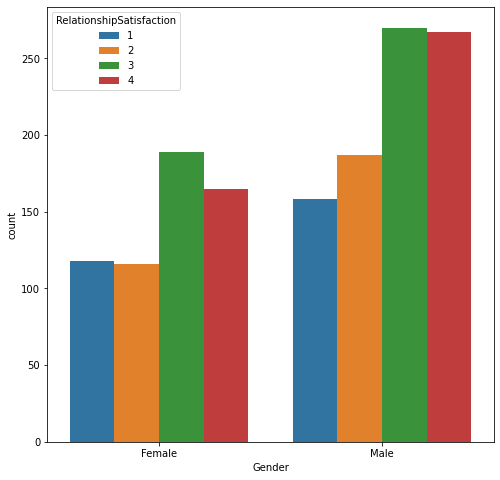

Gender vs  EducationField 
*************


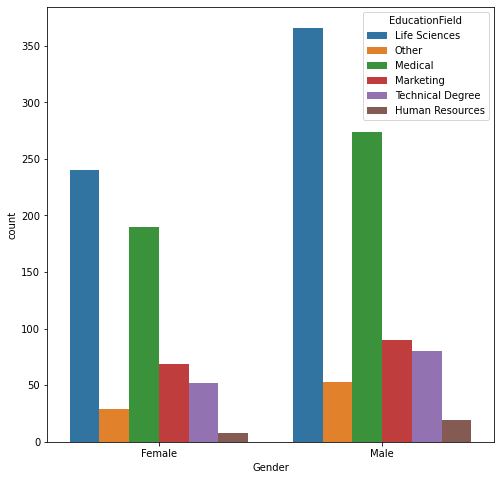

Gender vs  Attrition 
*************


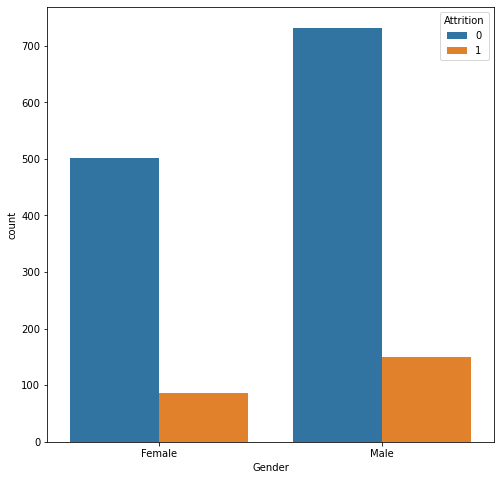

Gender vs  Department 
*************


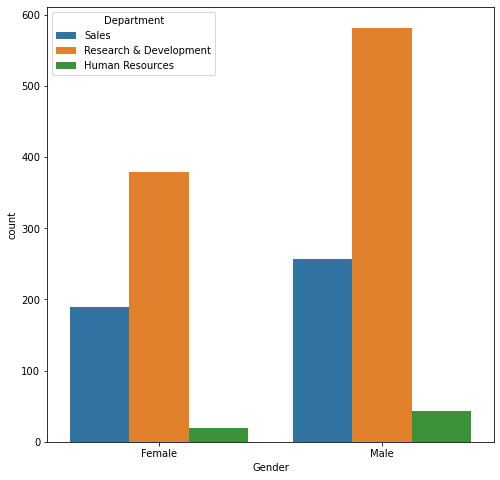

Gender vs  Education 
*************


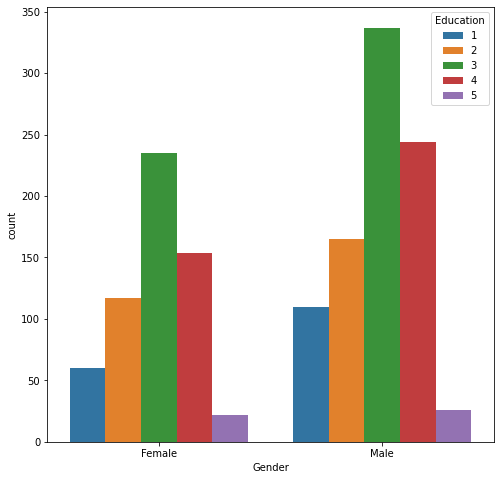

Gender vs  StockOptionLevel 
*************


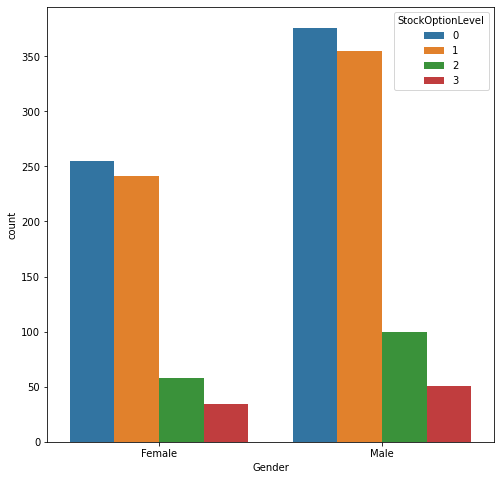

Gender vs  TrainingTimesLastYear 
*************


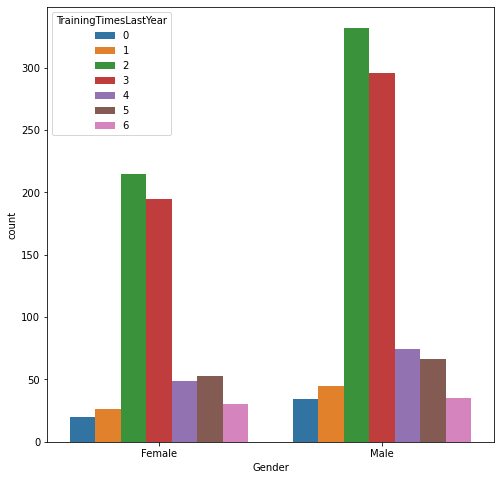

Gender vs  WorkLifeBalance 
*************


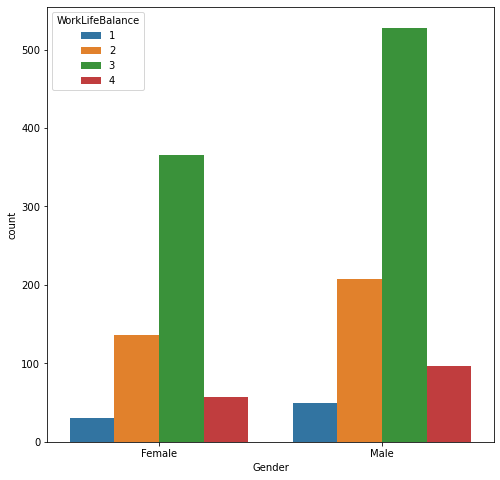

Gender vs  YearsWithCurrManager 
*************


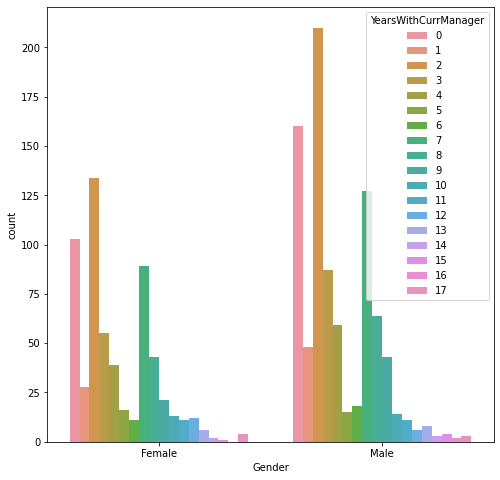

Gender vs  PerformanceRating 
*************


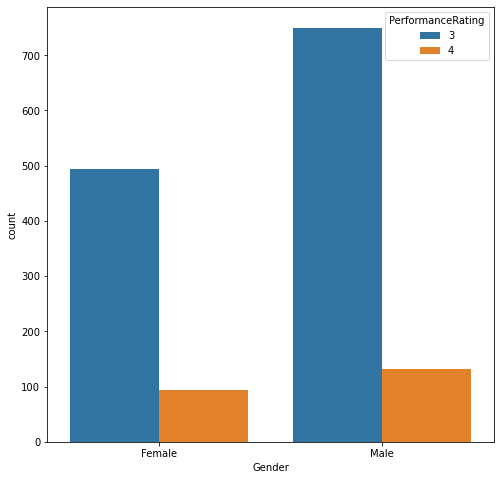

Gender vs  PercentSalaryHike 
*************


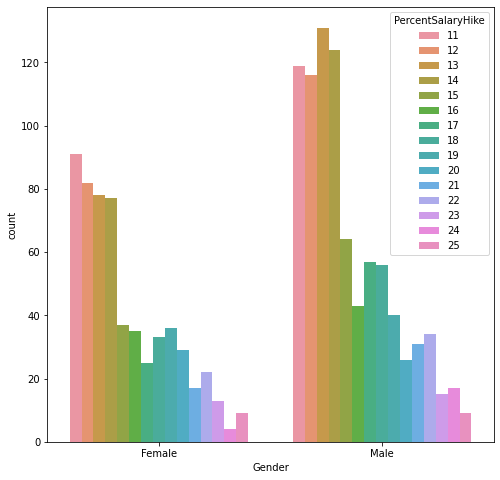

Gender vs  OverTime 
*************


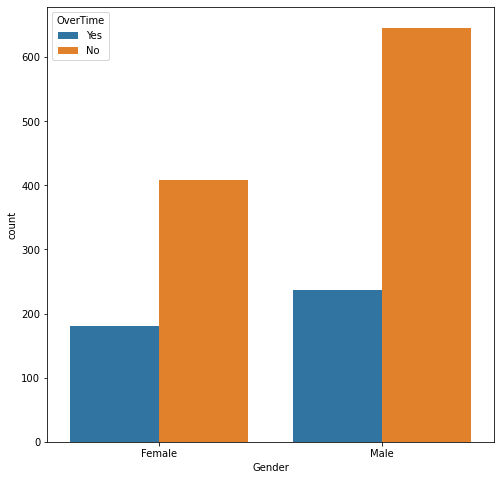

Gender vs  NumCompaniesWorked 
*************


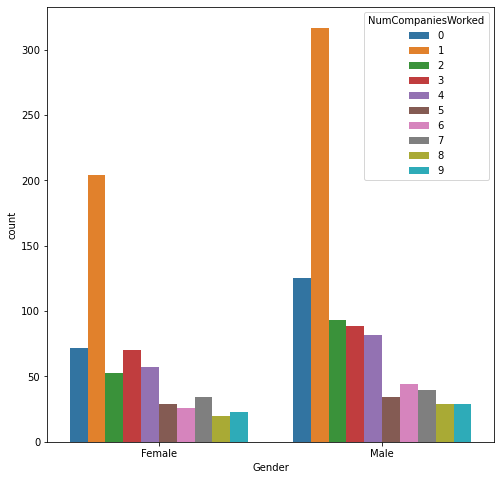

Gender vs  MaritalStatus 
*************


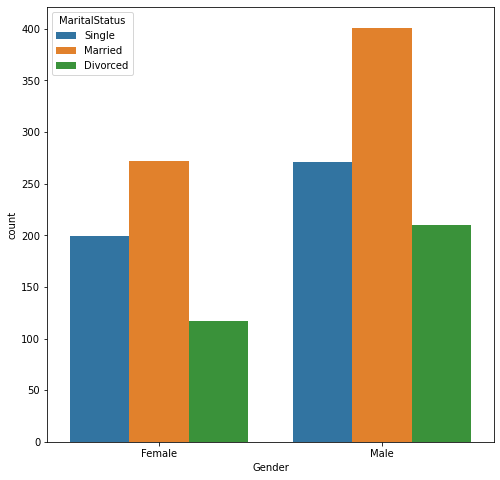

Gender vs  JobRole 
*************


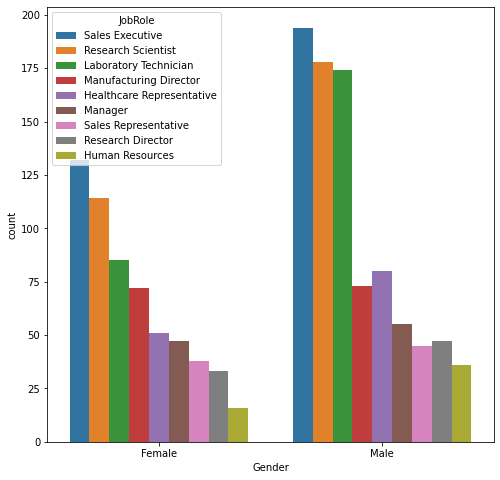

Gender vs  JobLevel 
*************


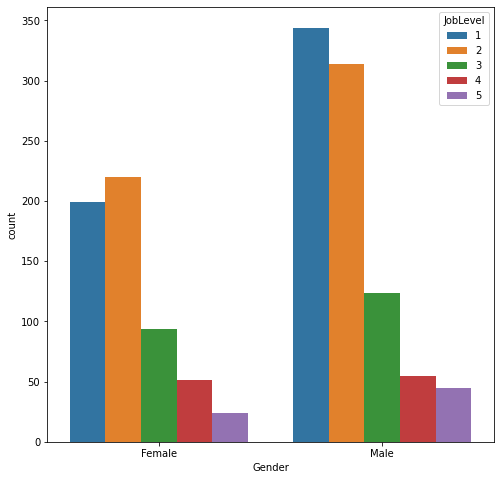

Gender vs  EnvironmentSatisfaction 
*************


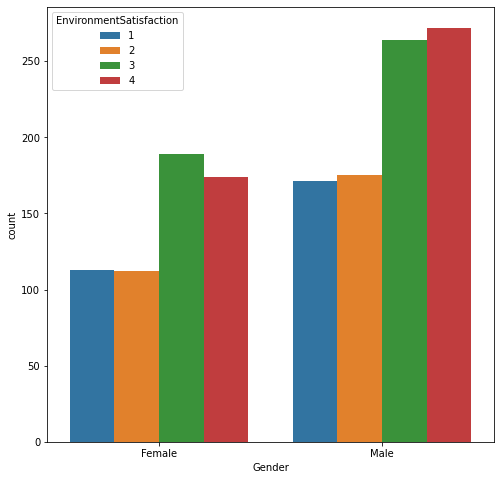

Gender vs  BusinessTravel 
*************


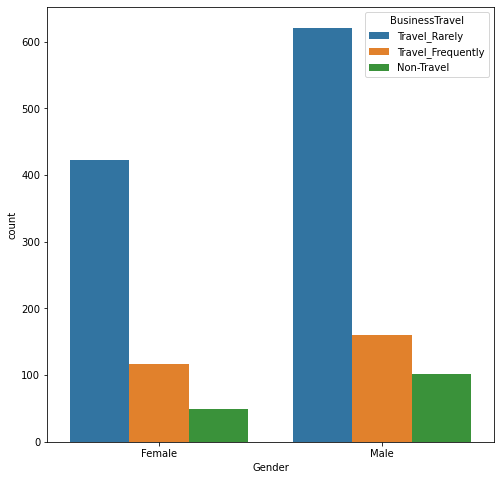

Gender vs  JobInvolvement 
*************


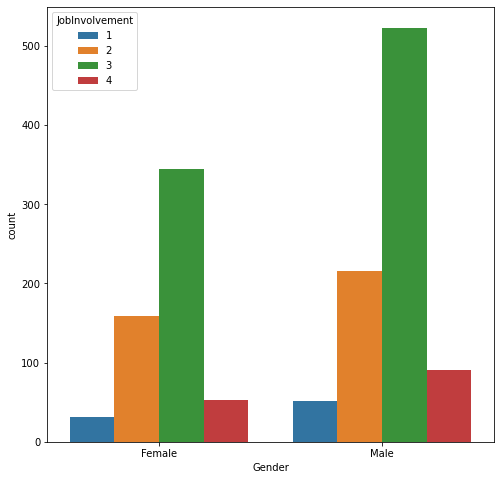

In [150]:
hrow = ['RelationshipSatisfaction','EducationField','Attrition','Department','Education','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsWithCurrManager','PerformanceRating','PercentSalaryHike','OverTime','NumCompaniesWorked','MaritalStatus','JobRole','JobLevel','EnvironmentSatisfaction','BusinessTravel','JobInvolvement']
for h in hrow:
    print('Gender vs ',h,'\n*************')
    plt.figure(figsize=(8,8))
    sns.countplot(x='Gender',hue=h,data=df_hr)
    plt.show()

In [151]:
# 1 --We can see that company has more male workers then female worker
# 2 --Company has a lot of employees from medical and life science education background
# 3 --Company has a high focus on R&D as alot of people working in that domain
# 4 --Equal amount of male and female have a high education
# 5 --Most employees have 2-3 hrs of training last year
# 6 --Most employees have spent either 2 or 6 years with their current manager
# 7 --Almost same amount of males and females have '4' as their Performance rating
# 8 --Most females got a salary hike of 11% whereas more males got a salary hike of 13% last year
# 9 --Almost same amount of male and female are working overtime
# 10 --Highest amount of people are working their second in the company
# 11 --Majority of female works at level 2 whereas males have higher population in level 1 

Department for  None 
*************


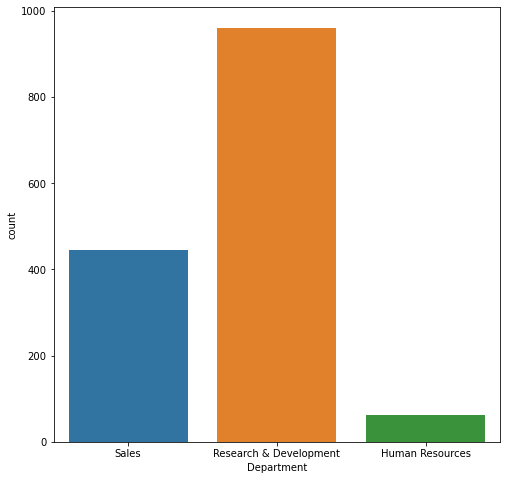

Department for  Gender 
*************


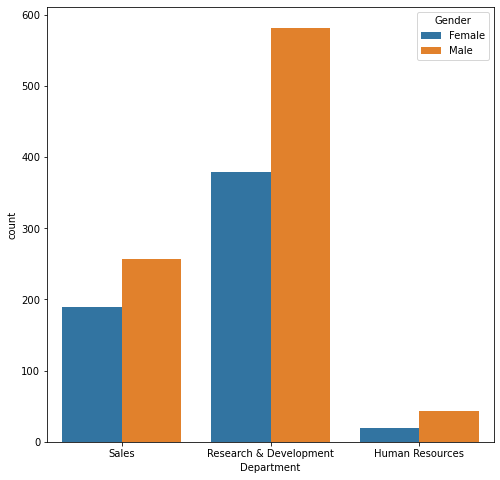

Department for  RelationshipSatisfaction 
*************


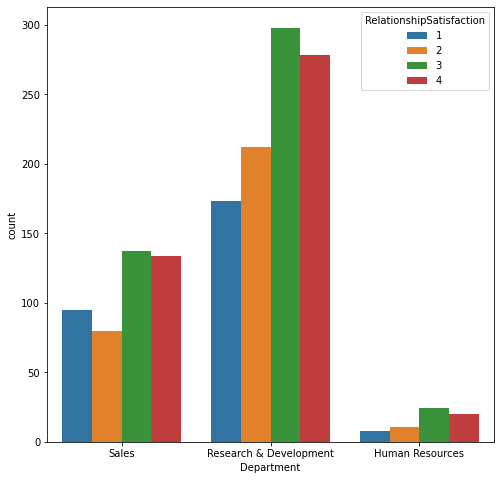

Department for  EducationField 
*************


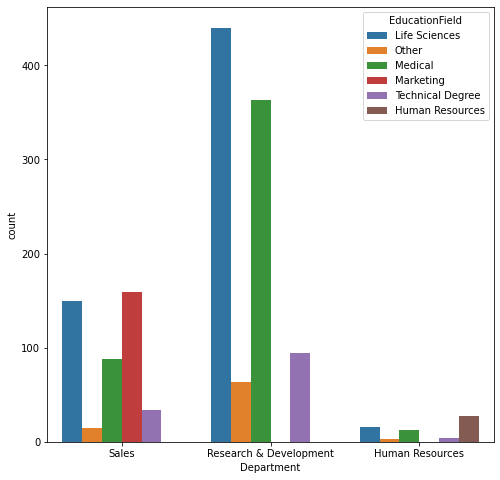

Department for  Education 
*************


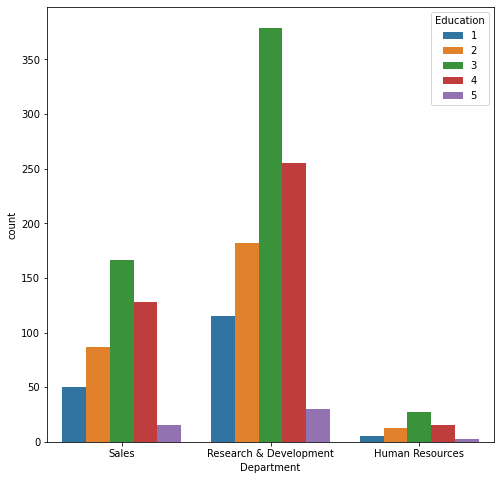

Department for  StockOptionLevel 
*************


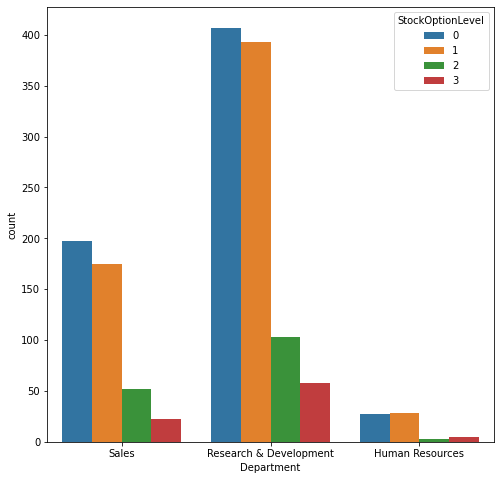

Department for  TrainingTimesLastYear 
*************


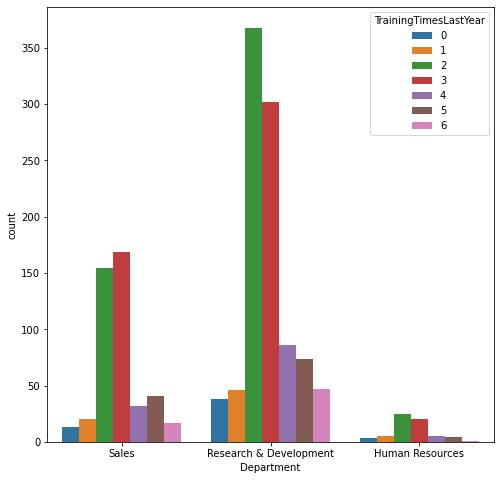

Department for  WorkLifeBalance 
*************


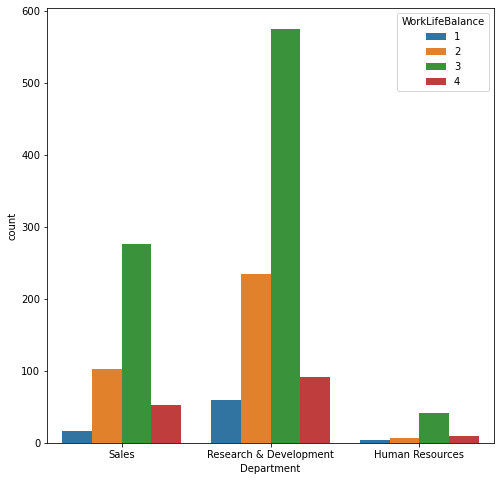

Department for  YearsWithCurrManager 
*************


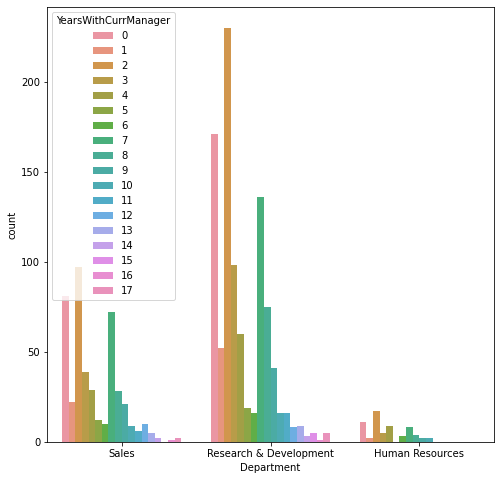

Department for  PerformanceRating 
*************


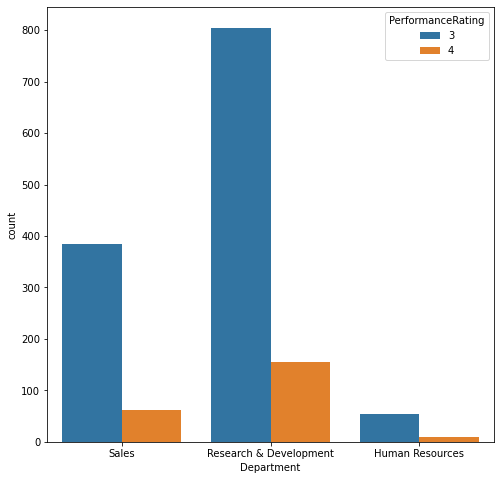

Department for  PercentSalaryHike 
*************


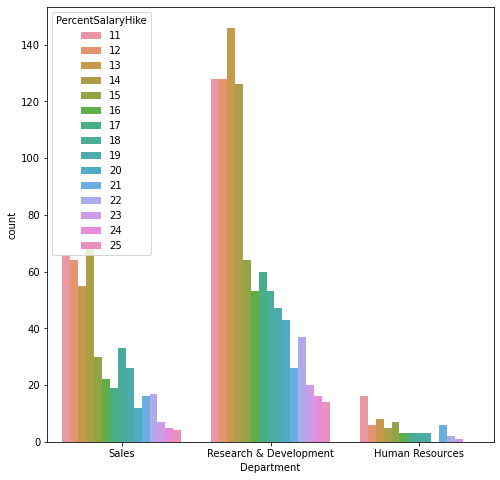

Department for  OverTime 
*************


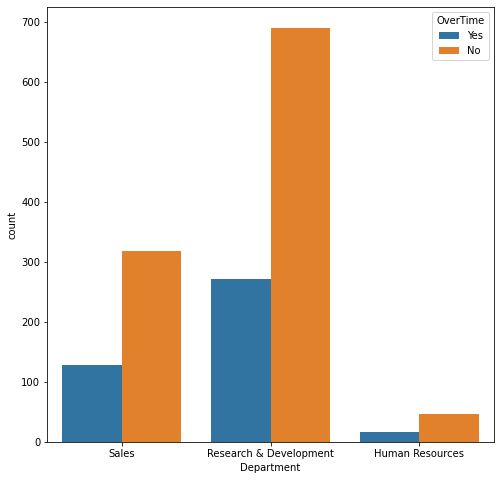

Department for  NumCompaniesWorked 
*************


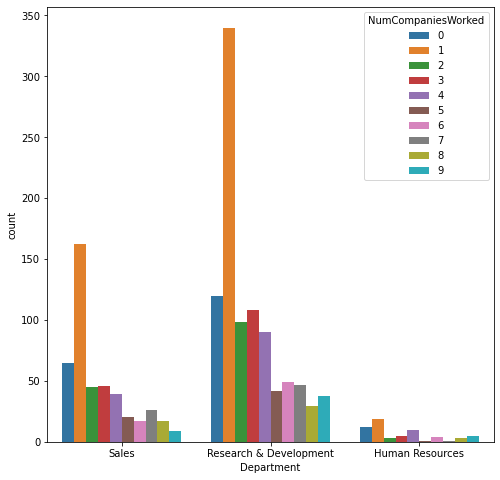

Department for  MaritalStatus 
*************


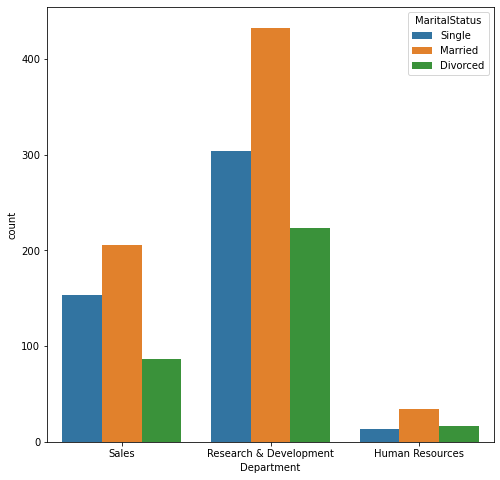

Department for  JobRole 
*************


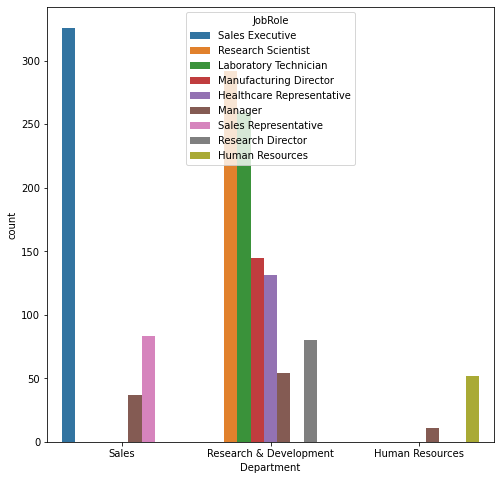

Department for  JobLevel 
*************


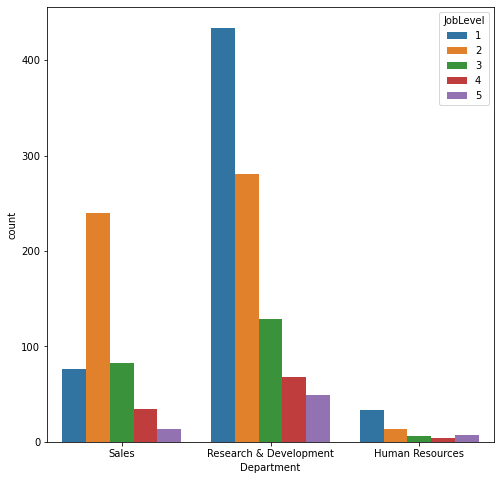

Department for  EnvironmentSatisfaction 
*************


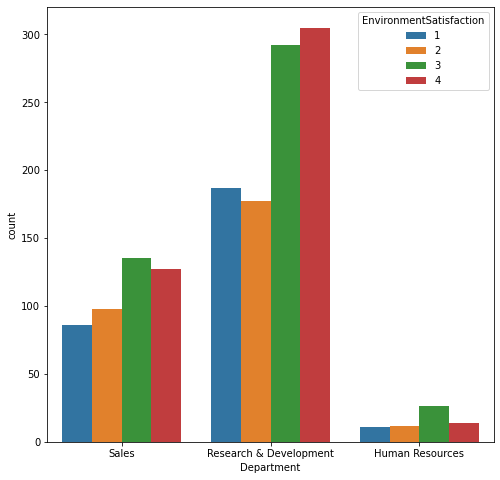

Department for  BusinessTravel 
*************


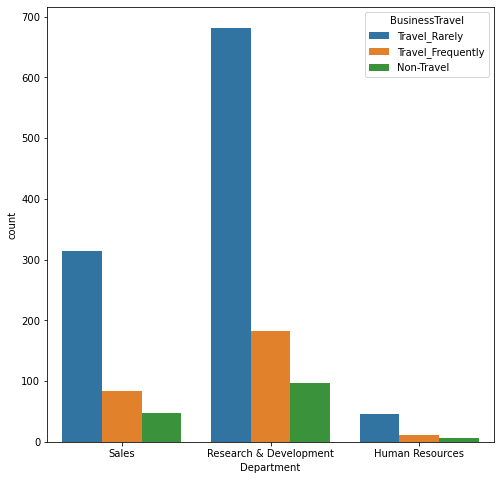

Department for  JobInvolvement 
*************


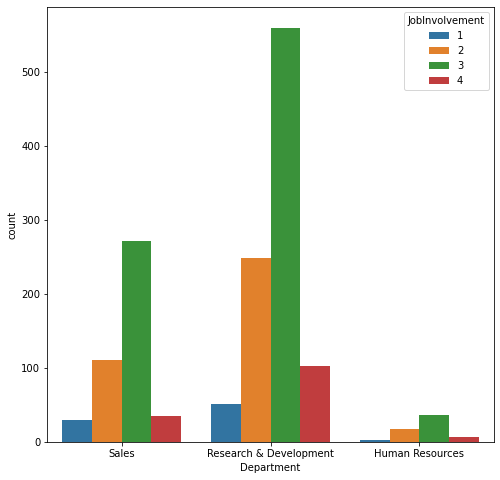

In [152]:
#Checking relation according to department

hrow = [None,'Gender','RelationshipSatisfaction','EducationField','Education','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsWithCurrManager','PerformanceRating','PercentSalaryHike','OverTime','NumCompaniesWorked','MaritalStatus','JobRole','JobLevel','EnvironmentSatisfaction','BusinessTravel','JobInvolvement']
for h in hrow:
    print('Department for ',h,'\n*************')
    plt.figure(figsize=(8,8))
    sns.countplot(x='Department',hue=h,data=df_hr)
    plt.show()

In [153]:
# 1 -- People havingLife science , medical and techincal degree are common in all departments in company
# 2 -- Sales has high rate of attrition as compared to other departments
# 3 -- Majority of Sales have 14% salary hike whereas R&D had 13% salary hike and HumanResources had 11% salary hike
# 4 --  Sales have higher density of people at job level 2 whereas other department has at level 1 
# 5 -- R&D has a good proportion of people having better job satisfaction

Attrition vs  None 
*************


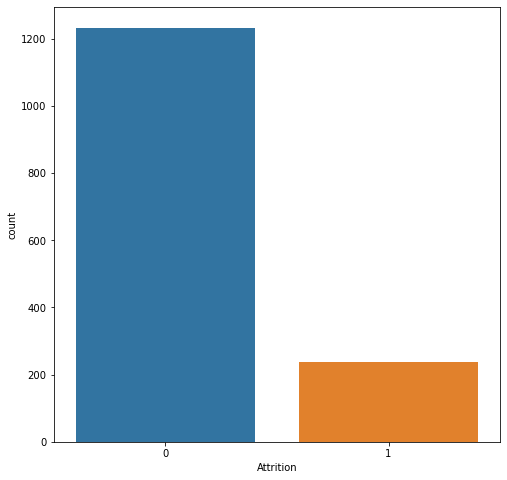

Attrition vs  Department 
*************


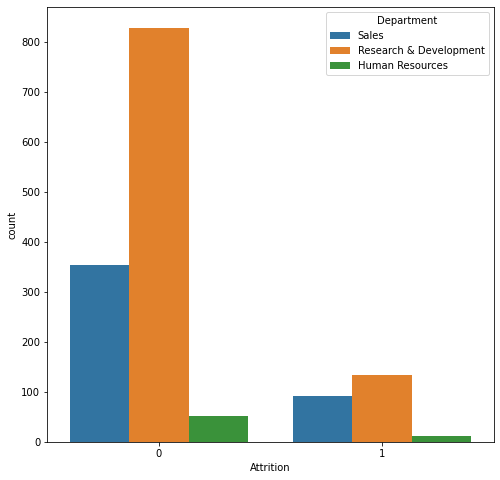

Attrition vs  Gender 
*************


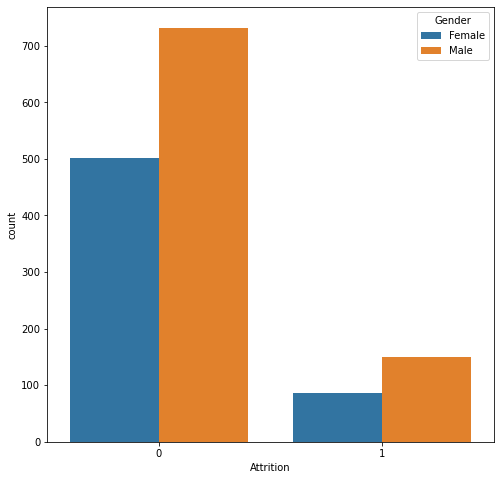

Attrition vs  RelationshipSatisfaction 
*************


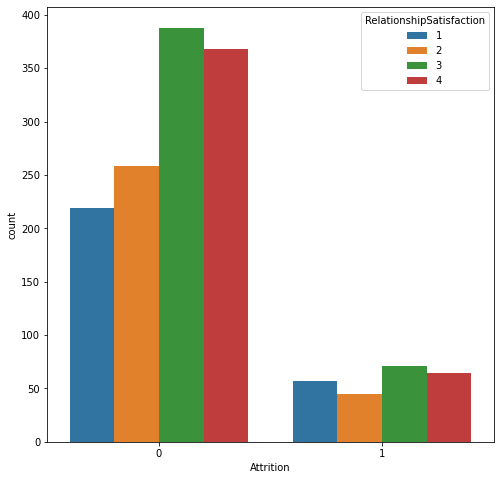

Attrition vs  EducationField 
*************


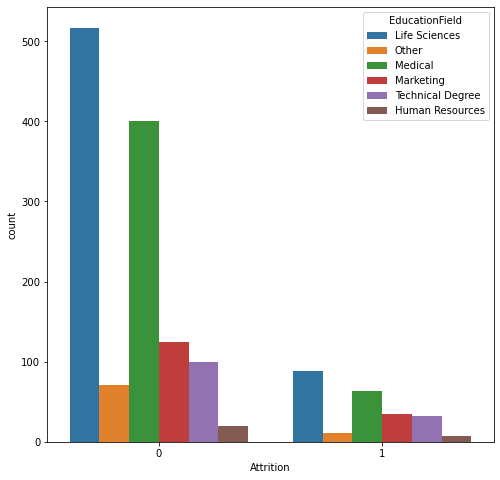

Attrition vs  Education 
*************


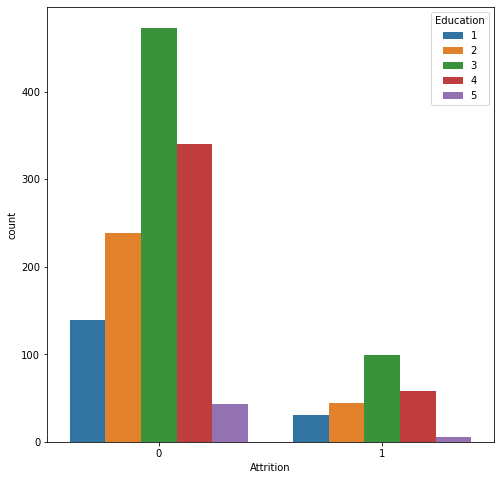

Attrition vs  StockOptionLevel 
*************


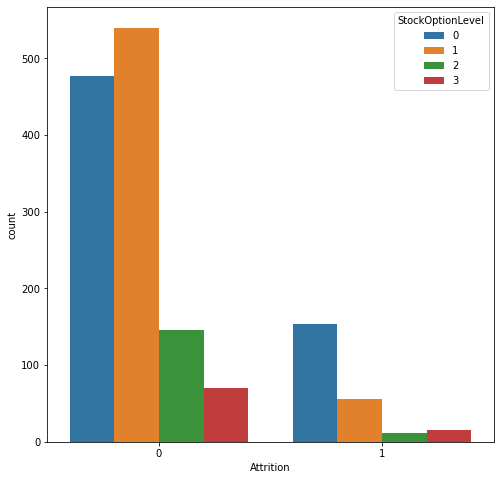

Attrition vs  TrainingTimesLastYear 
*************


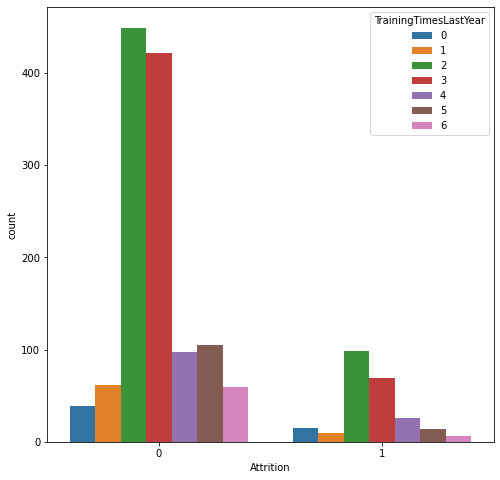

Attrition vs  WorkLifeBalance 
*************


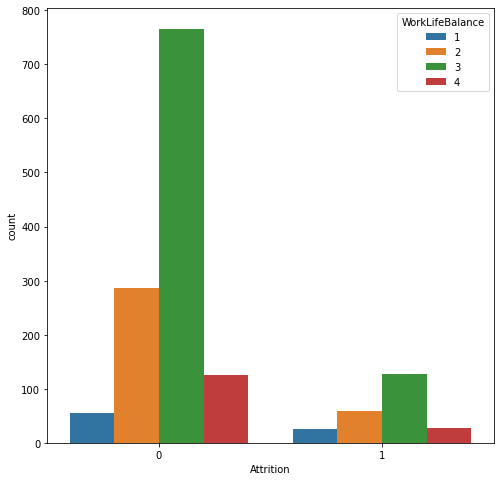

Attrition vs  YearsWithCurrManager 
*************


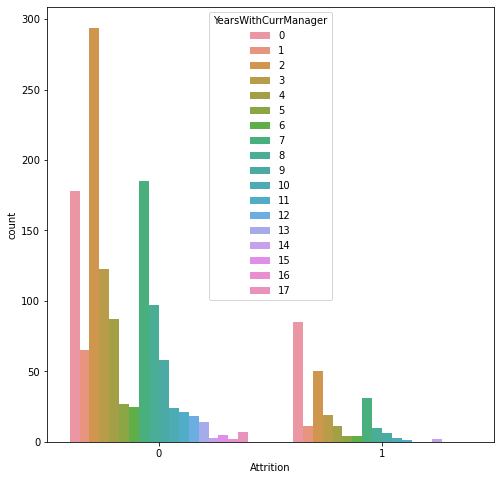

Attrition vs  PerformanceRating 
*************


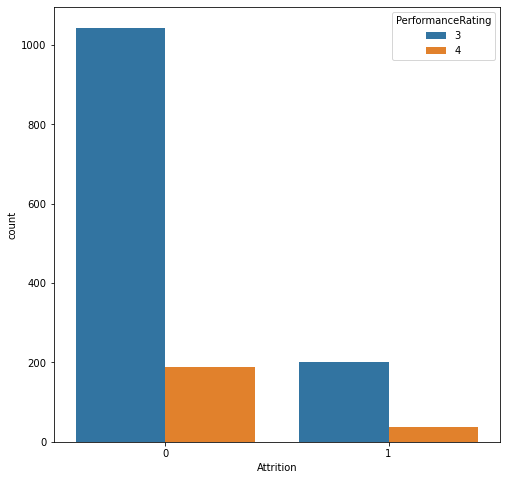

Attrition vs  PercentSalaryHike 
*************


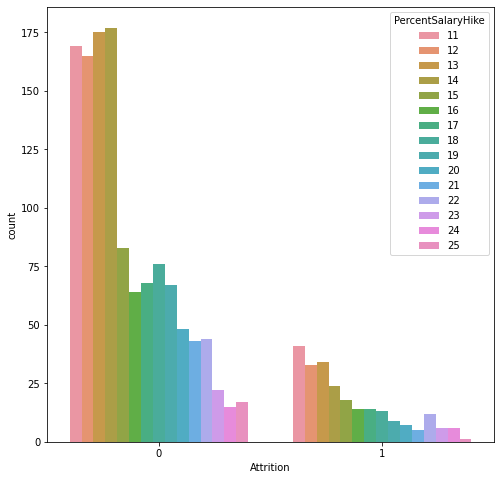

Attrition vs  OverTime 
*************


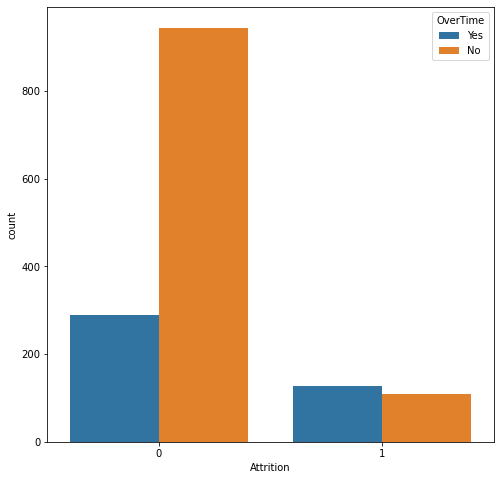

Attrition vs  NumCompaniesWorked 
*************


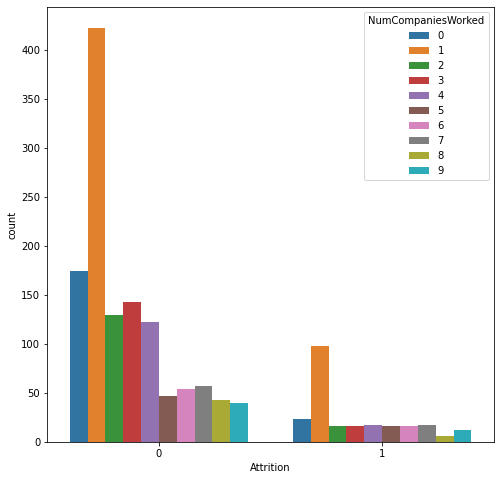

Attrition vs  MaritalStatus 
*************


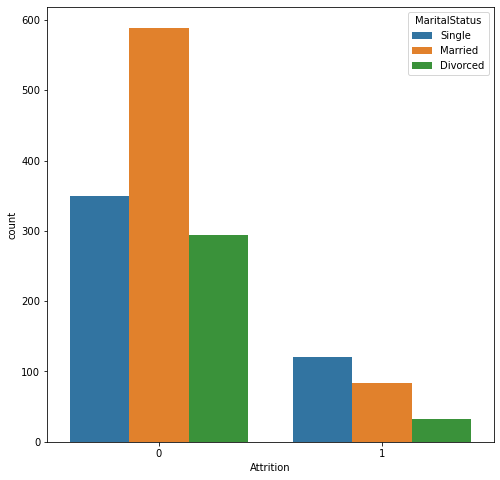

Attrition vs  JobRole 
*************


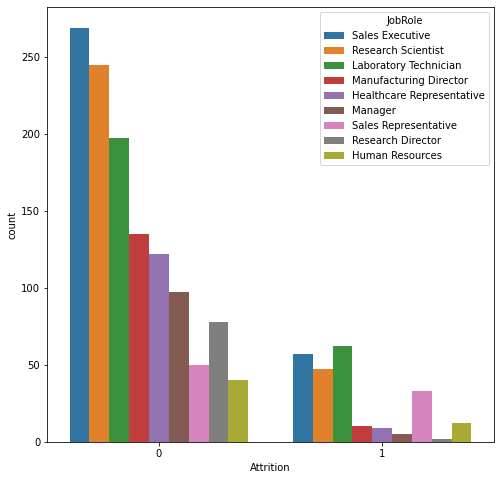

Attrition vs  JobLevel 
*************


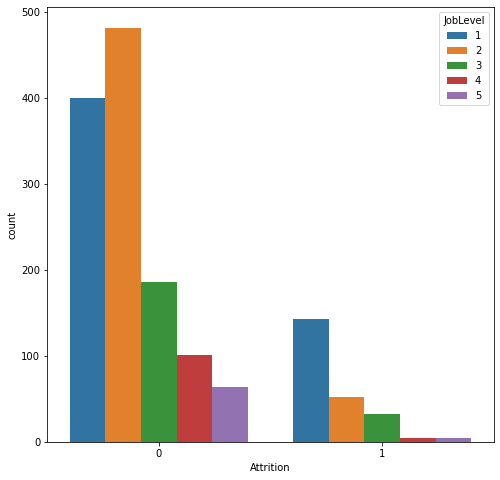

Attrition vs  EnvironmentSatisfaction 
*************


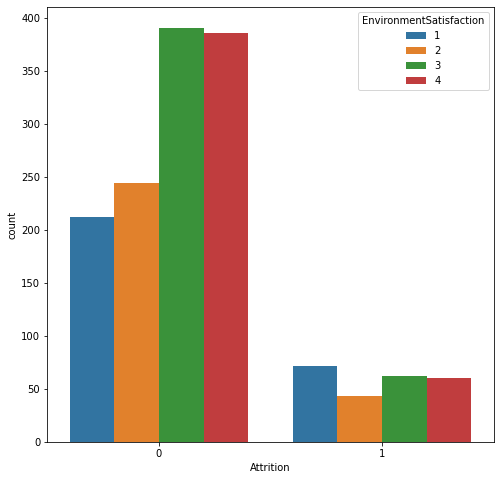

Attrition vs  BusinessTravel 
*************


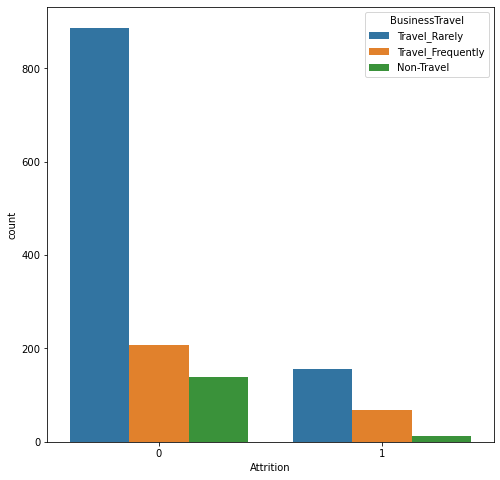

Attrition vs  JobInvolvement 
*************


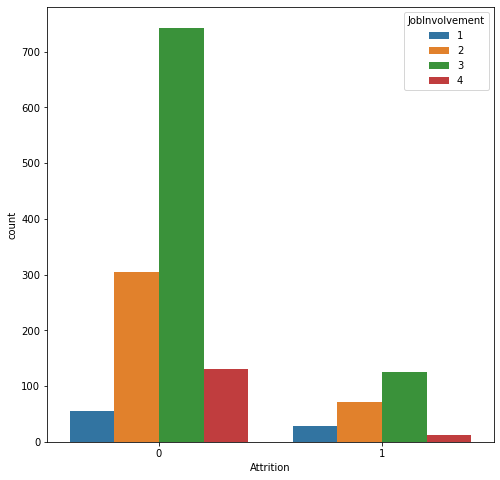

In [154]:
#Checking data with respect to attrition

hrow = [None,'Department','Gender','RelationshipSatisfaction','EducationField','Education','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance','YearsWithCurrManager','PerformanceRating','PercentSalaryHike','OverTime','NumCompaniesWorked','MaritalStatus','JobRole','JobLevel','EnvironmentSatisfaction','BusinessTravel','JobInvolvement']
for h in hrow:
    print('Attrition vs ',h,'\n*************')
    plt.figure(figsize=(8,8))
    sns.countplot(x='Attrition',hue=h,data=df_hr)
    plt.show()

In [155]:
# 1 -- High percentage of people with life science background
# 2 -- More people which are about leave are working more at night shift
# 3 -- People with marital status single are leaving the company
# 4 -- Most people from sales department are leaving job
# 5 -- People at lower level are more likely to leave the company
# 6 -- Even with least amount of people being not satisfied with jobs are likely to leave their jobs

In [156]:
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [157]:
for col in df_hr.columns:  
    print('\n\n\n',col,'***********\n')
    print(df_hr.loc[:,col].value_counts())




 Age ***********

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64



 Attrition ***********

0    1233
1     237
Name: Attrition, dtype: int64



 BusinessTravel ***********

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64



 DailyRate ***********

691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64



 Department ***********

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64



 DistanceFromH





 MonthlyIncome ***************



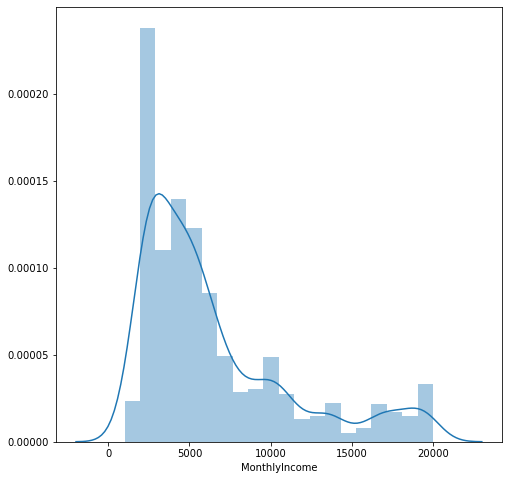





 HourlyRate ***************



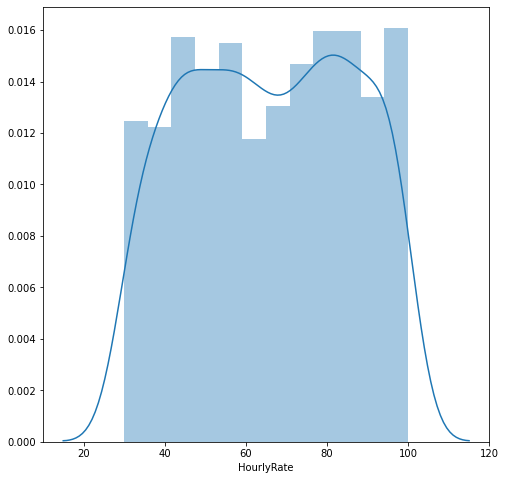





 MonthlyRate ***************



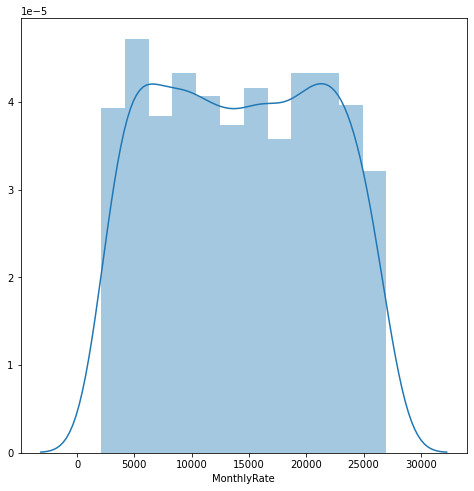





 YearsAtCompany ***************



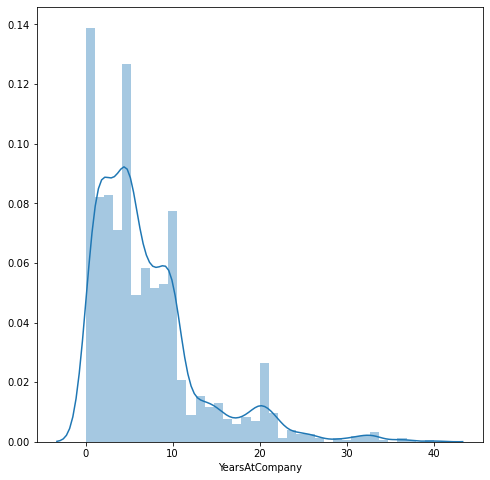





 YearsInCurrentRole ***************



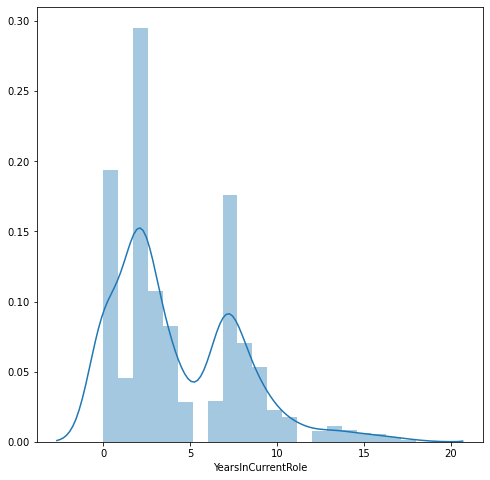





 YearsSinceLastPromotion ***************



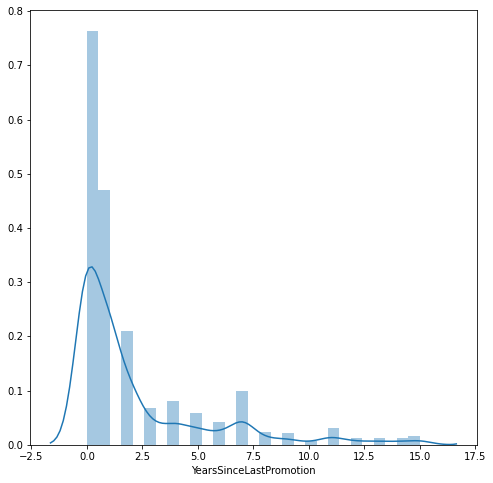





 YearsWithCurrManager ***************



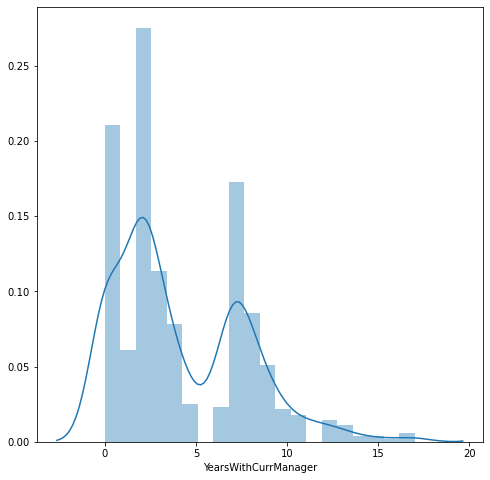

In [158]:
dst = ['MonthlyIncome','HourlyRate','MonthlyRate','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for i in dst:
    print('\n\n\n\n',i,'***************\n')
    plt.figure(figsize=(8,8))
    sns.distplot(df_hr.loc[:,i])
    plt.show()

In [159]:
#Majority people stay at he company for 2-3 and 6-7 years at the company
#YearWithCurrManager and YearsInCurrentRole has similar graphical properties which suggest that people generally change
#their manager with change in job role

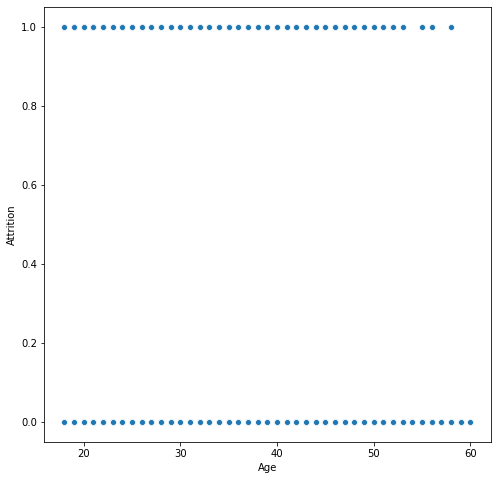

In [160]:
#Age 
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='Attrition',data=df_hr)
plt.show()

In [161]:
#dropping somw useless columns
df_hr.drop(columns=['EmployeeNumber','Over18','StandardHours'],inplace=True)

In [162]:
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,4,...,3,4,0,17,3,2,9,6,0,8


In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
les = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in les:
    df_hr.loc[:,col] = le.fit_transform(df_hr.loc[:,col])

    
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,4,...,3,4,0,17,3,2,9,6,0,8


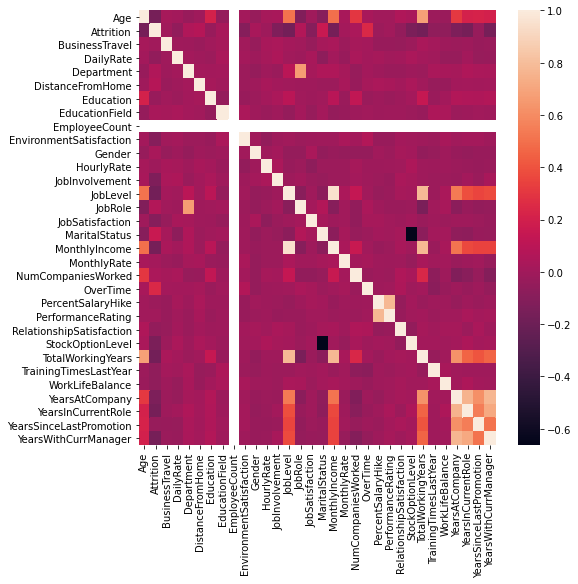

In [164]:
#Heat map of correlation  
hmap_corr = df_hr.corr()
plt.figure(figsize=(8,8))
sns.heatmap(hmap_corr)
plt.show()

In [165]:
hmap_corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,NaN,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


In [166]:
df_hr.drop(columns='EmployeeCount',inplace=True)

In [167]:
#sns.pairplot(df_hr)

In [168]:
#Now we will remove outliers
from scipy.stats import zscore
z = np.abs(zscore(df_hr))
z

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [169]:
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [170]:
threshold = 3 
df_hr = df_hr[(z<3).all(axis=1)]
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [171]:
#Let's check for skewness now
df_hr.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [172]:
#Power Transformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for col in df_hr.columns:
    if df_hr.loc[:,col].skew() > 0.55 or df_hr.loc[:,col].skew() < -0.55:
        if col != 'Attrition':
            df_hr[col] = pt.fit_transform(df_hr[col].to_frame())
        
df_hr.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -0.960583
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -0.008149
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
Y

In [173]:
#Now let's scale the data after dividing the data
x = df_hr.drop(columns='Attrition')
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.638730,1102,2,-1.489968,2,1,2,0,94,...,0.0,1,-1.084263,-0.173231,-2.608524,-2.147950,0.231837,0.290524,-1.073534,0.582177
1,49,-1.380776,279,1,0.244561,1,1,3,1,61,...,0.0,4,0.548653,0.147620,0.217074,0.274860,0.948319,1.006575,0.193168,1.018073
2,37,0.638730,1373,1,-1.028366,2,4,4,1,92,...,0.0,2,-1.084263,-0.351153,0.217074,0.274860,-2.156089,-1.571814,-1.073534,-1.528426
3,33,-1.380776,1392,1,-0.698191,4,1,4,0,56,...,0.0,3,-1.084263,-0.173231,0.217074,0.274860,0.621429,1.006575,1.027520,-1.528426
4,27,0.638730,591,1,-1.028366,1,3,1,1,40,...,0.0,4,0.548653,-0.544046,0.217074,0.274860,-0.933983,-0.390769,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,-1.380776,884,1,1.408969,2,3,3,1,41,...,0.0,3,0.548653,1.039364,0.217074,0.274860,0.003289,-0.390769,-1.073534,0.018680
1466,39,0.638730,613,1,-0.049519,1,3,4,1,42,...,0.0,1,0.548653,-0.007630,1.606919,0.274860,0.436162,1.006575,0.193168,1.018073
1467,27,0.638730,155,1,-0.440553,3,1,2,1,87,...,0.0,2,0.548653,-0.544046,-2.608524,0.274860,0.231837,-0.390769,-1.073534,0.018680
1468,49,-1.380776,1023,2,-1.028366,3,3,4,1,63,...,0.0,4,-1.084263,1.039364,0.217074,-1.112829,0.791264,0.793764,-1.073534,1.205782


In [174]:
y = df_hr.loc[:,'Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int64

In [175]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_x = sc.fit_transform(x)


In [176]:
X = pd.DataFrame(df_x,columns = x.columns)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.638730,0.734325,1.405373,-1.489968,-0.876177,-0.940815,-0.665328,-1.229911,1.388670,...,0.0,-1.575817,-1.084263,-0.173231,-2.608524,-2.147950,0.231837,0.290524,-1.073534,0.582177
1,1.442111,-1.380776,-1.307769,-0.496337,0.244561,-1.853858,-0.940815,0.251978,0.813067,-0.239091,...,0.0,1.199034,0.548653,0.147620,0.217074,0.274860,0.948319,1.006575,0.193168,1.018073
2,0.083966,0.638730,1.406752,-0.496337,-1.028366,-0.876177,1.305159,1.169285,0.813067,1.290017,...,0.0,-0.650866,-1.084263,-0.351153,0.217074,0.274860,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.368749,-1.380776,1.453896,-0.496337,-0.698191,1.079185,-0.940815,1.169285,-1.229911,-0.485721,...,0.0,0.274084,-1.084263,-0.173231,0.217074,0.274860,0.621429,1.006575,1.027520,-1.528426
4,-1.047821,0.638730,-0.533609,-0.496337,-1.028366,-1.853858,0.556501,-1.582635,0.813067,-1.274939,...,0.0,1.199034,0.548653,-0.544046,0.217074,0.274860,-0.933983,-0.390769,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-1.380776,0.193406,-0.496337,1.408969,-0.876177,0.556501,0.251978,0.813067,-1.225613,...,0.0,0.274084,0.548653,1.039364,0.217074,0.274860,0.003289,-0.390769,-1.073534,0.018680
1383,0.310324,0.638730,-0.479021,-0.496337,-0.049519,-1.853858,0.556501,1.169285,0.813067,-1.176286,...,0.0,-1.575817,0.548653,-0.007630,1.606919,0.274860,0.436162,1.006575,0.193168,1.018073
1384,-1.047821,0.638730,-1.615447,-0.496337,-0.440553,0.101504,-0.940815,-0.665328,0.813067,1.043387,...,0.0,-0.650866,0.548653,-0.544046,-2.608524,0.274860,0.231837,-0.390769,-1.073534,0.018680
1385,1.442111,-1.380776,0.538304,1.405373,-1.028366,0.101504,0.556501,1.169285,0.813067,-0.140439,...,0.0,1.199034,-1.084263,1.039364,0.217074,-1.112829,0.791264,0.793764,-1.073534,1.205782


In [177]:
#Let's again check skewness after Scaling the data
for col in df_hr.columns:
    if df_hr.loc[:,col].skew() > 0.55 or df_hr.loc[:,col].skew() < -0.55:
        print(True)
    else:
        print(False)

False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False


In [178]:
#MODEL PREPARATION
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [179]:
y.replace(to_replace=2.248726,value=1,inplace=True)
y.replace(to_replace=-0.444696,value=0,inplace=True)

In [180]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int64

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [182]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GaussianNB(),SVC(),GradientBoostingClassifier()]
for m in models:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    acc = accuracy_score(y_test,pred)
    print(m,'\n accuracy score : ',acc,'\n\n\n')

LogisticRegression() 
 accuracy score :  0.841726618705036 



DecisionTreeClassifier() 
 accuracy score :  0.7985611510791367 



KNeighborsClassifier() 
 accuracy score :  0.8237410071942446 



RandomForestClassifier() 
 accuracy score :  0.8381294964028777 



GaussianNB() 
 accuracy score :  0.7949640287769785 



SVC() 
 accuracy score :  0.8633093525179856 



GradientBoostingClassifier() 
 accuracy score :  0.8345323741007195 





In [201]:
def best_acc_random(model):
    acc_score = 0
    m = 0
    random = 0
    for i in range(0,200):
        x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc > acc_score:
            acc_score = acc
            m = model
            random = i
    return print('Best accuracy score : ',acc_score,'for model : ',m,'at random state : ',random)

In [191]:
mlist = [GradientBoostingClassifier(),LogisticRegression(),SVC(),RandomForestClassifier()]
for m in mlist:
    best_acc_random(m)

For best accuracy score :  0.9064748201438849 for model :  GradientBoostingClassifier() for random state :  48
For best accuracy score :  0.9172661870503597 for model :  LogisticRegression() for random state :  6
For best accuracy score :  0.9100719424460432 for model :  SVC() for random state :  126
For best accuracy score :  0.9064748201438849 for model :  RandomForestClassifier() for random state :  126


In [192]:
#All models are giving good accuracy 
#let's check cross validation score
mlist = [GradientBoostingClassifier(),LogisticRegression(),SVC(),RandomForestClassifier()]
for m in mlist:
    cvs = cross_val_score(m,x,y,cv=5,scoring='accuracy').mean()
    print('Cross val score : ',cvs,'for model ',m)

Cross val score :  0.8594135521907385 for model  GradientBoostingClassifier()
Cross val score :  0.8586993221307431 for model  LogisticRegression()
Cross val score :  0.8348959821312626 for model  SVC()
Cross val score :  0.8536347817053217 for model  RandomForestClassifier()


In [193]:
#Logistic Regression is giving good accuracy and show low overfitting properties as well
#Let's check the best parameters for all the model showing good response
def best_parameter(model,para):
    from sklearn.model_selection import GridSearchCV
    
    grd = GridSearchCV(model,para,cv=5,scoring='accuracy')
    grd.fit(X,y)
    return [grd.best_params_, grd.best_score_]

In [194]:
#GradientBoostingClassifier
gbc = GradientBoostingClassifier()
params = {
    'learning_rate':[0.001,0.01,0.1,1],
    'n_estimators':list(range(50,300,50))
}
best_parameter(gbc,params)

[{'learning_rate': 0.1, 'n_estimators': 200}, 0.8658987611354959]

In [195]:
#Logistic Regression
lgr = LogisticRegression()
params = {
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
best_parameter(lgr,params)

[{'penalty': 'l2', 'solver': 'newton-cg'}, 0.8738358050022075]

In [199]:
#RandomForestClassifier
rfc =RandomForestClassifier()
params = {
    'n_estimators':list(range(50,300,50)),
    'criterion':['gini','entropy']
}
best_parameter(rfc,params)

[{'criterion': 'gini', 'n_estimators': 150}, 0.8594161493909566]

In [202]:
#Hence LogisticRegression showing best results so let's finalise the model
lgr = LogisticRegression(penalty='l2',solver='newton-cg')

best_acc_random(lgr)
cvs = cross_val_score(lgr,X,y,cv=5,scoring='accuracy').mean()
print('\n\nCross validation score is : ',cvs)

Best accuracy score :  0.9172661870503597 for model :  LogisticRegression(solver='newton-cg') at random state :  6


Cross validation score is :  0.8738358050022075


In [203]:
import joblib 
joblib.dump(lgr,'Project4_HR_Attrition.csv')

['Project4_HR_Attrition.csv']